In [1]:
import pandas as pd
import altair as alt

ModuleNotFoundError: No module named 'altair'

In [34]:
df = pd.read_csv("PCA_results/pca_stats.csv")

In [36]:
df.columns = [i[:-7] for i in df.columns]

In [37]:
df = df.melt(value_vars=df.columns, value_name="variance", var_name="type")

In [60]:
bars = alt.Chart(df, width=600, height=300).mark_bar().encode(
    x='type',
    y='mean(variance)'
)

In [67]:
errors = alt.Chart(df, width=600, height=300).mark_rule(color='gray', strokeWidth=2).encode(
    x='type',
    y=alt.Y('ci0(variance):Q', title='percentage of variance explained'),
    y2='ci1(variance):Q'
)

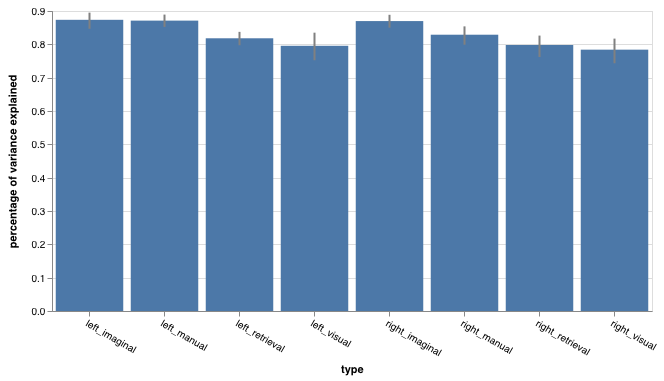

In [68]:
alt.layer(bars, errors).configure_axisX(
    labelAngle=30
)